Name: Nicholas Darren Rafael

NIM: 2702261012

Final Project Machine Learning

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches
import os
import scipy.stats as stats

# Data Understanding and Preparation

In [2]:
filepath = 'C:/Users/Nicholas Darren/BINUS/Semester 3/Final Project Machine Learning - 2702261012/Dataset A/3A.tsv'
df = pd.read_csv(filepath, sep='\t')

In [3]:
df.head(10)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,-706.0,NaN,NaN
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,-92.0,NaN,NaN
5,5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,-397.0,NaN,NaN
6,6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,-273.0,NaN,NaN


In [4]:
df.tail(10)

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16918,16918,Dark Souls II,PS4,2015,Role-Playing,Namco Bandai Games,0.21,0.23,0.08,0.09,0.6,NaN,NaN,NaN,-747.0,NaN,NaN
16919,16919,Monster Trucks,GBA,2004,Racing,Majesco Entertainment,0.43,0.16,0.00,0.01,0.6,NaN,NaN,tbd,-320.0,Skyworks Technologies,E
16920,16920,World of Zoo,Wii,2009,Simulation,THQ,0.40,0.15,0.00,0.05,0.6,NaN,NaN,8.2,6.0,Blue Fang Games,E
16921,16921,Shadow The Hedgehog,PS2,2005,Platform,Sega,0.50,0.02,0.00,0.08,0.6,45.0,28.0,6,137.0,Sonic Team,E10+
16922,16922,Wave Race: Blue Storm,GC,2001,Racing,Nintendo,0.40,0.10,0.09,0.02,0.6,80.0,21.0,8.3,29.0,Nintendo,E
16923,16923,Aliens: Colonial Marines,PS3,2013,Shooter,Sega,0.20,0.29,0.00,0.11,0.6,43.0,25.0,3.6,295.0,Gearbox Software,M
16924,16924,Backyard Wrestling: Don't Try This at Home,PS2,2003,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.6,51.0,24.0,7.8,29.0,Paradox Development,M
16925,16925,Yakuza: Dead Souls,PS3,2011,Shooter,Sega,0.09,0.06,0.42,0.03,0.6,64.0,55.0,7.4,69.0,Ryu ga Gotoku Studios,M
16926,16926,Fight Night Round 2,XB,2005,Fighting,Electronic Arts,0.42,0.16,0.00,0.02,0.6,88.0,48.0,8.8,27.0,EA Sports,T
16927,16927,MonHun Nikki: Poka Poka Ailu Mura,PSP,2010,Role-Playing,Capcom,0.00,0.00,0.60,0.00,0.6,NaN,NaN,NaN,-170.0,NaN,NaN


In [5]:
df.shape

(16928, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16928 non-null  int64  
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       16928 non-null  float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(8

In [7]:
df.describe()

,index,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,16928.000000,8260.000000,8260.000000,16928.000000
mean,8463.500000,1974.215147,0.266390,0.146850,0.078170,0.047861,0.539520,69.037893,26.428692,-195.792120
std,4886.837014,252.128480,0.814326,0.504585,0.308756,0.186675,1.550545,13.943198,18.989929,545.393536
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,-1000.000000
25%,4231.750000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,-538.000000
50%,8463.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,22.000000,-82.000000
75%,12695.250000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.490000,79.000000,36.000000,21.000000
max,16927.000000,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [8]:
df.nunique()

index              16928
Name               11562
Platform              31
Year_of_Release       49
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count          1888
Developer           1696
Rating                 8
dtype: int64

# Data Preprocessing

## Delete Identifiers

In [9]:
df.drop(columns=['index'], inplace = True)

We can drop **index** column because this column contain unique values and isn't relevant when building recommender system

## Handling Missing Values

In [10]:
df['User_Score'].replace('tbd', np.nan, inplace=True)

# Convert to numeric
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

In **User_Score** column, there are 'TBD' values which has the same purpose of NaN so we can drop the NULL values, and don't forget to convert to numeric, which the same datatype as **User_Score** column

In [11]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            55
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8668
Critic_Count       8668
User_Score         9210
User_Count            0
Developer          6688
Rating             6836
dtype: int64

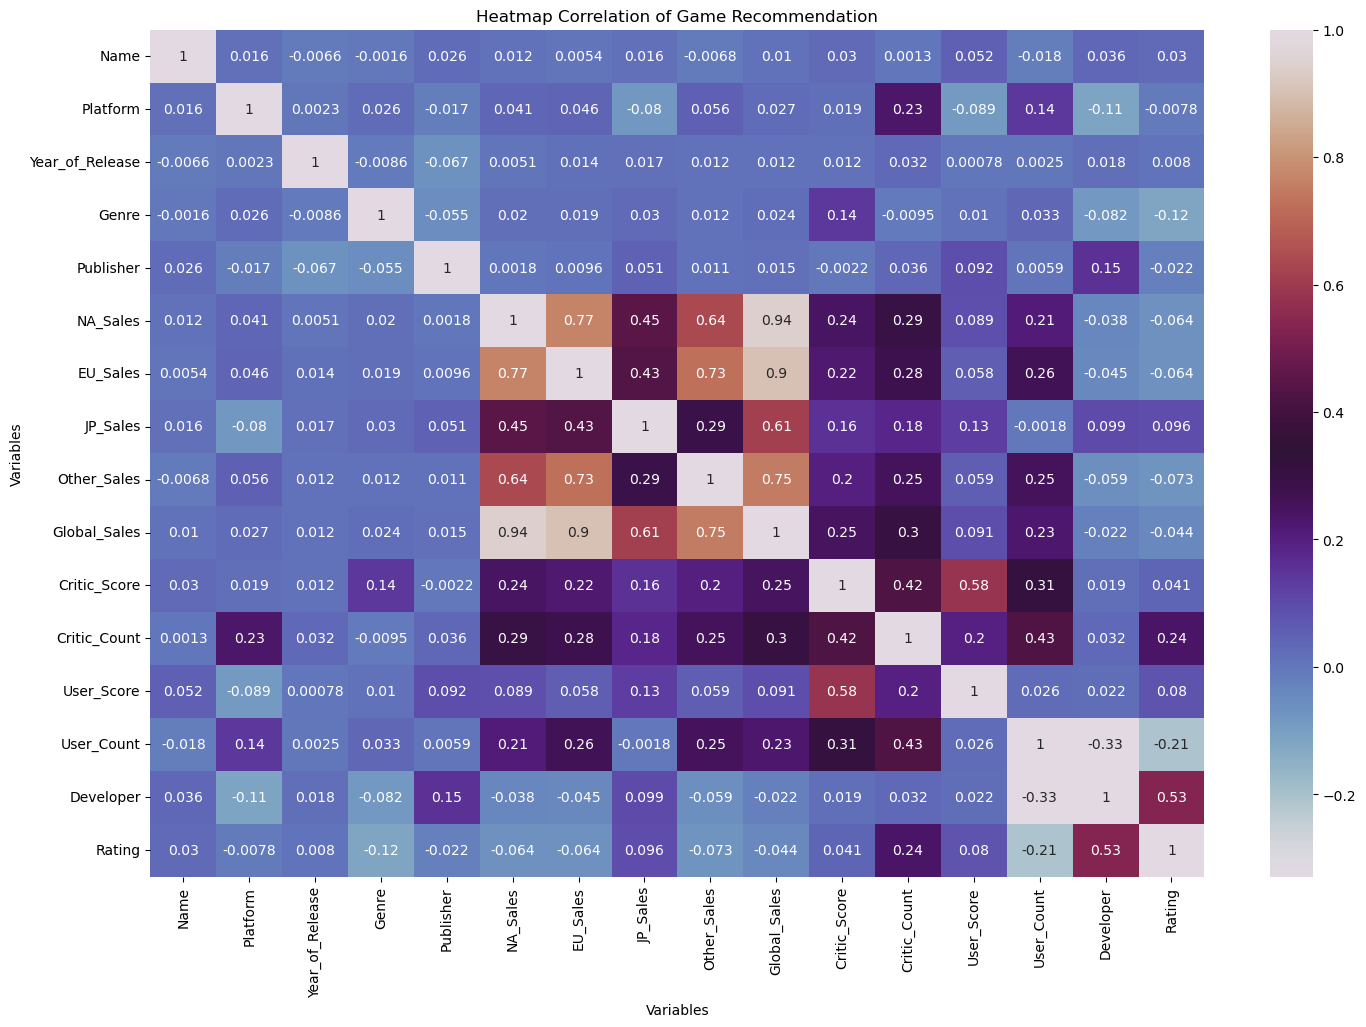

In [12]:
# Heatmap
data = df.copy()

binEnc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = binEnc.fit_transform(data[col].astype(str))

correlation_matrix_all = data.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix_all, annot=True, cmap="twilight")
plt.title("Heatmap Correlation of Game Recommendation")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

In [13]:
df['Developer'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Unknown', inplace=True)

We can fill the NaN values with 'Unknown' in *Developer* and *Rating* columns, so when we use the mode, it doesn't impact the model's performance

In [14]:
df.drop(columns=['Critic_Score', 'Critic_Count', 'User_Score'], inplace=True)

We can drop three of this columns, because they are the columns that contain the first and second most amount of missing values, and  also both of this columns (*Critic_Score* and *Critic_Count*) are not worthy of attention for recommender system analysis.

In [15]:
df.dropna(inplace = True)

We can drop the NaN values in the remaining missing values columns (*Name*, *Genre*, *Publisher*), because they have a little amount of missing values.

## Handling Duplicated Data

In [16]:
df.duplicated().sum()

125

In [17]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

# EDA (Exploratory Data Analysis)

In [18]:
categoricalCol = []
numericalCol = []

for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numericalCol.append(i)
    else:
        categoricalCol.append(i)

# Display the categorical and numerical columns
print(f'Categorical Columns: {categoricalCol}')
print(f'Numeric Columns: {numericalCol}')

Categorical Columns: ['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']
Numeric Columns: ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'User_Count']


In [19]:
for i in categoricalCol:
    print(df[i].value_counts(),'\n')

Name
Need for Speed: Most Wanted                           12
LEGO Marvel Super Heroes                               9
Madden NFL 07                                          9
Ratatouille                                            9
FIFA 14                                                9
                                                      ..
Mega Man Battle Network 5: Team Colonel / Protoman     1
Saka-Tsuku DS: Touch and Direct                        1
Tales of VS.                                           1
Critical Depth                                         1
Haitaka no Psychedelica                                1
Name: count, Length: 11514, dtype: int64 

Platform
PS2     2167
DS      2155
PS3     1332
Wii     1325
X360    1260
PSP     1209
PS      1207
PC       969
XB       825
GBA      803
GC       560
3DS      524
PSV      433
PS4      396
N64      325
XOne     249
SNES     242
SAT      175
WiiU     147
2600     136
GB        99
NES       98
DC        52
GEN       27
NG  

In [20]:
for i in numericalCol:
    print(df[i].value_counts(),'\n')

Year_of_Release
2008    1433
2009    1431
2010    1257
2007    1201
2011    1135
2006    1007
2005     936
2002     834
2003     778
2004     745
2012     656
2015     608
2014     588
2013     544
2016     503
2001     484
1998     383
2000     352
1999     343
1997     293
1996     267
1995     222
1994     121
1993      61
1981      46
1992      43
1991      42
1982      39
3         30
7         28
10        28
2         28
6         28
8         27
5         25
1986      21
1         21
4         20
1989      17
1983      17
1987      16
9         16
1990      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: count, dtype: int64 

NA_Sales
0.00     4518
0.02      576
0.03      561
0.04      549
0.01      544
         ... 
2.34        1
3.48        1
4.00        1
2.61        1
41.36       1
Name: count, Length: 402, dtype: int64 

EU_Sales
0.00     5888
0.01     1493
0.02     1308
0.03      926
0.04      708
         ... 
2.14        1
1.75    

## Handling Anomalies

In [21]:
# Filter "Year_of_Release" rows
negativeYoR = df[df["Year_of_Release"] < 1950]
print(negativeYoR["Year_of_Release"].count())

251


Some of the Games' Release Year comes with a single digit, which is impossible, so we use Bertie the Brain's Release Year (1950) which is the oldest game in this dataset, to filter the Year_of_Release anomaly.

In [22]:
# Filter "User_Count" rows
negativeUC = df[df["User_Count"] < 0]
print(negativeUC["User_Count"].count())

9159


There are some **User_Count** values that are negative, which is impossible, so we filter out rows that less than 0.

In [23]:
positiveMedian = df[df["User_Count"] > 0]["User_Count"].median()

df["User_Count"] = df["User_Count"].apply(lambda x: positiveMedian if x < 0 else x)

print(df["User_Count"].describe())

count    16746.000000
mean        86.612922
std        384.064770
min          4.000000
25%         24.000000
50%         24.000000
75%         24.000000
max      10665.000000
Name: User_Count, dtype: float64


Replace **User_Count** missing values with **positive median**

In [24]:
# Filter out rows where 'Year_of_Release' is less than 1950
df = df[df["Year_of_Release"] >= 1950]

Make our main dataframe, with no values that below 1950.

## Heatmap

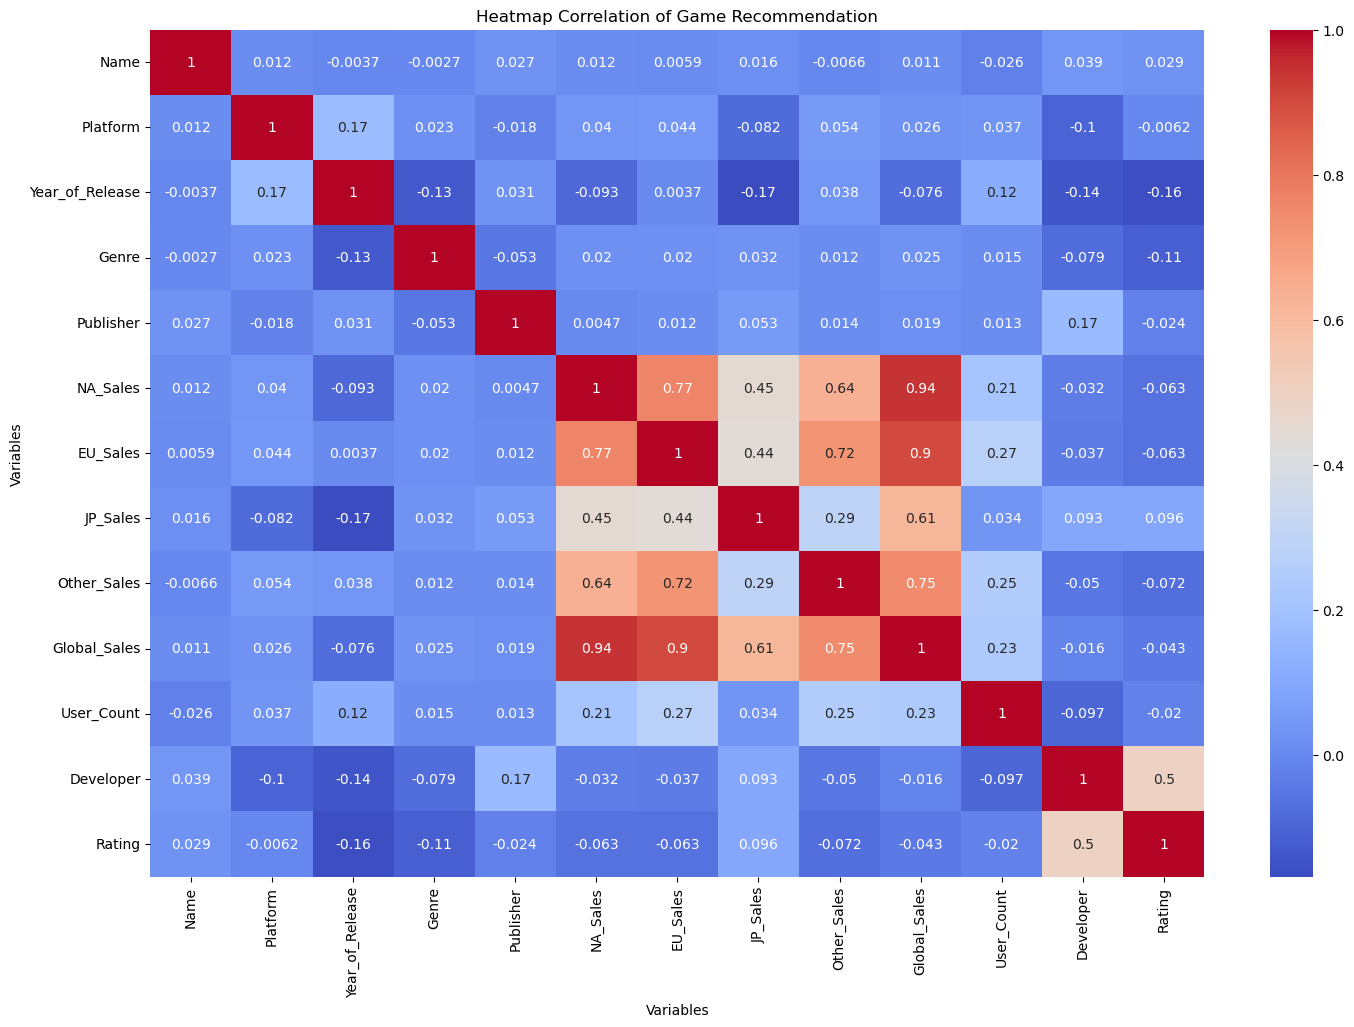

In [25]:
data = df.copy()

binEnc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = binEnc.fit_transform(data[col].astype(str))

correlation_matrix_all = data.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm")
plt.title("Heatmap Correlation of Game Recommendation")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

This is the heatmap after we handled anomalies and missing values

## Distribution of Numerical Columns

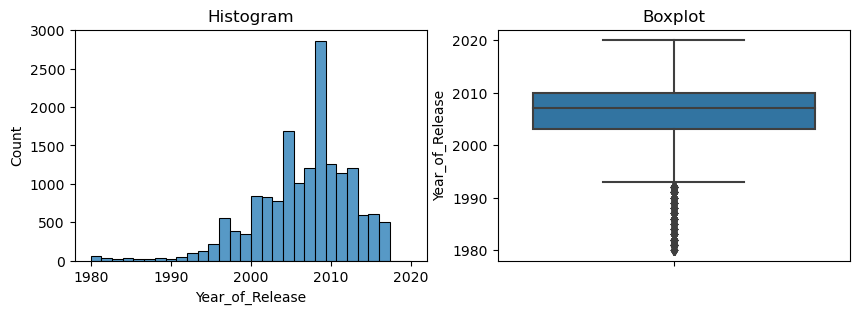

Skewness: -0.9754000647557888
Kurtosis: 1.7689352754520904


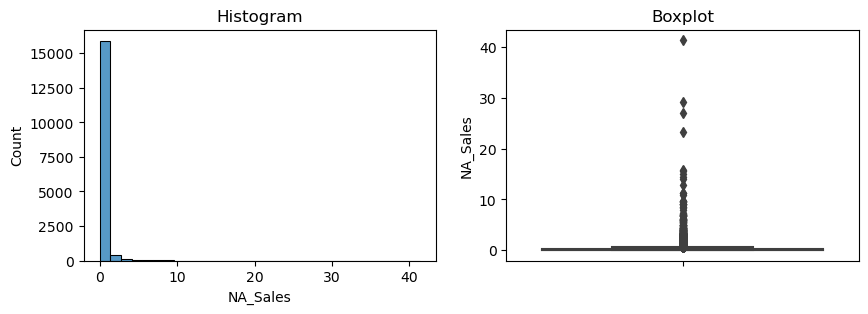

Skewness: 18.688687072907527
Kurtosis: 641.9446500968979


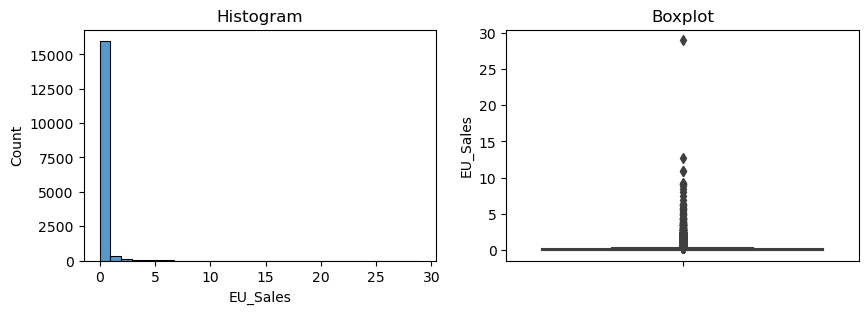

Skewness: 18.738452798697537
Kurtosis: 746.2404528724915


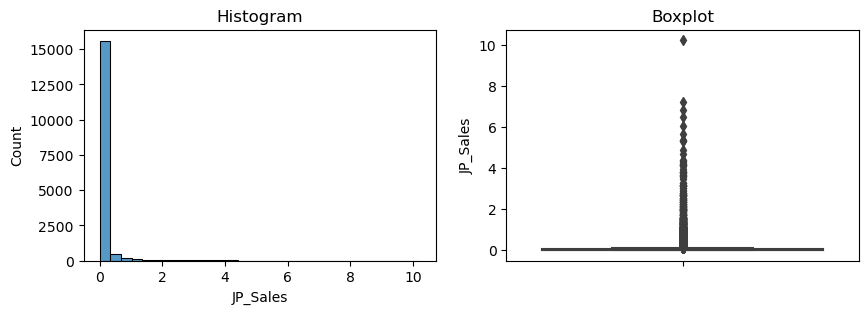

Skewness: 11.070250092790374
Kurtosis: 189.87166615170062


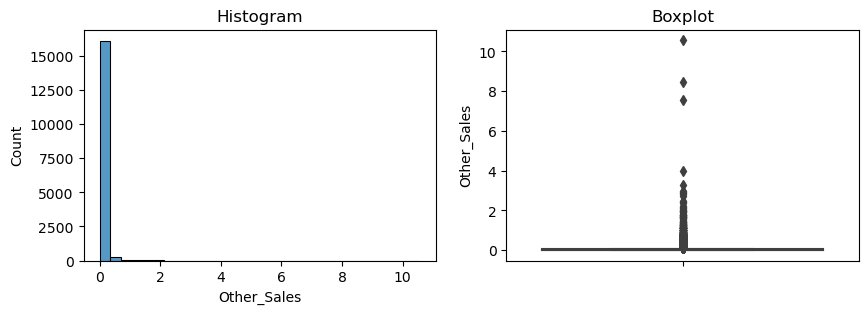

Skewness: 24.469223979053243
Kurtosis: 1043.9400116060492


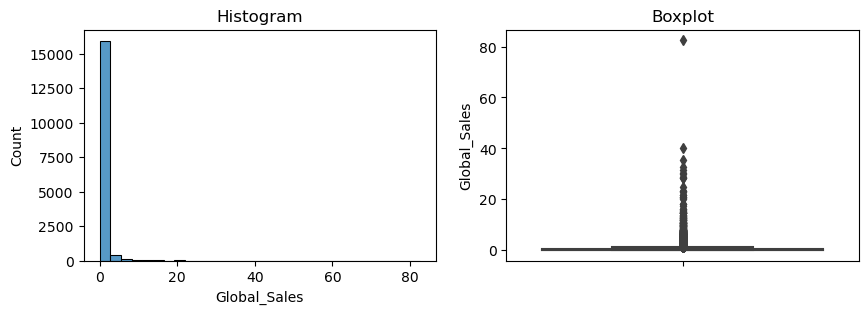

Skewness: 17.254903941484464
Kurtosis: 595.4579869766508


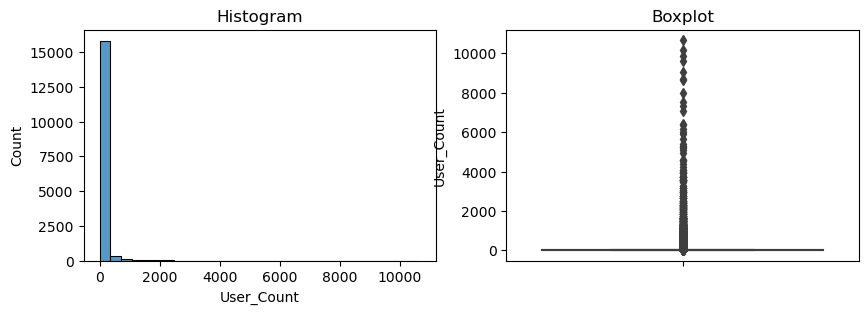

Skewness: 13.346730595878359
Kurtosis: 245.55094451197778


In [26]:
def checkDistribution(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[i].skew())
        print('Kurtosis:', df[i].kurt())

checkDistribution(df[numericalCol], numericalCol)

All of the numerical columns have outliers, but we shouldn't drop or impute them, all of the outliers are not anomaly, but instead they are reasonable because they contain valid data points.

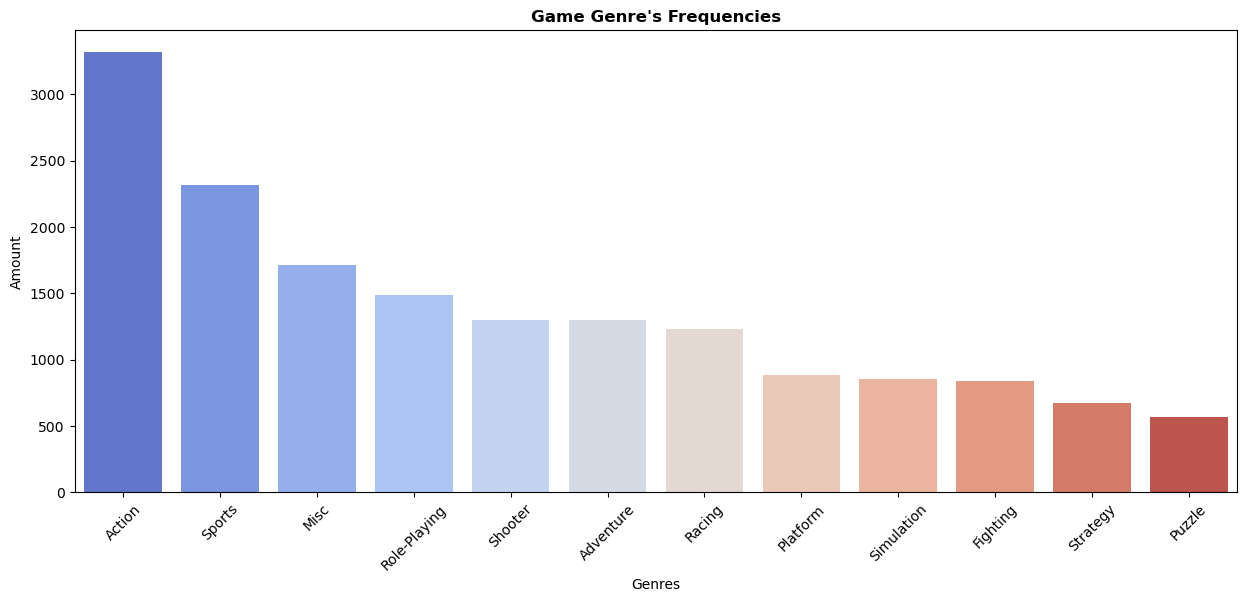

In [27]:
genres = df[df['Genre'].str.len() > 0]
genres = genres.explode('Genre')
genre_counts = genres['Genre'].value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')
plt.title("Game Genre's Frequencies", fontweight = "bold")
plt.xlabel('Genres')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

C:\Users\Nicholas Darren\AppData\Local\Temp\ipykernel_11764\2910530739.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Spectral', len(top_publishers))


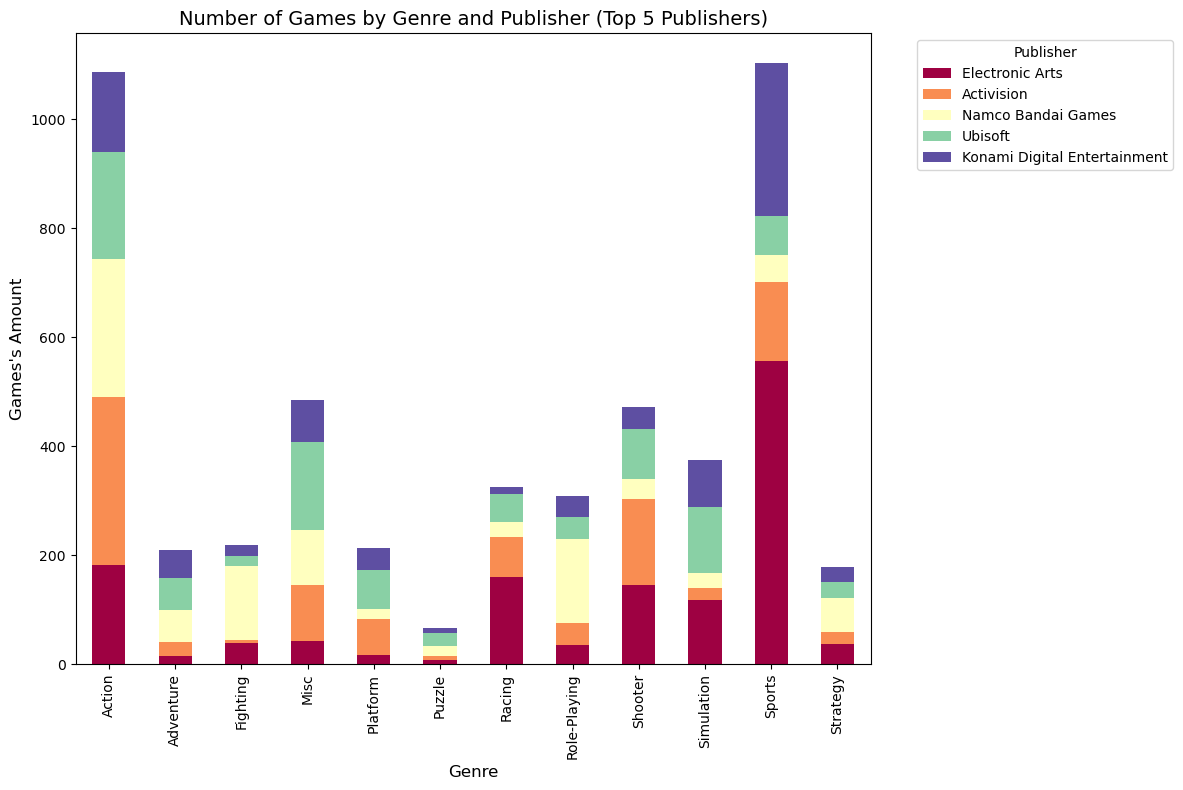

In [28]:
# Group data by Genre and Publisher
grouped_data = df.groupby(['Genre', 'Publisher']).size().unstack(fill_value=0)

# Select top 10 publishers based on total games
top_publishers = grouped_data.sum(axis=0).nlargest(5).index
filtered_data = grouped_data[top_publishers]

# Define a colormap
colors = cm.get_cmap('Spectral', len(top_publishers)) 

# Plot bar chart with custom colors
filtered_data.plot(
    kind='bar',
    figsize=(12, 8),
    stacked=True,
    color=[colors(i) for i in range(len(top_publishers))]
)

plt.title('Number of Games by Genre and Publisher (Top 5 Publishers)', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel("Games's Amount", fontsize=12)
plt.legend(title='Publisher', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

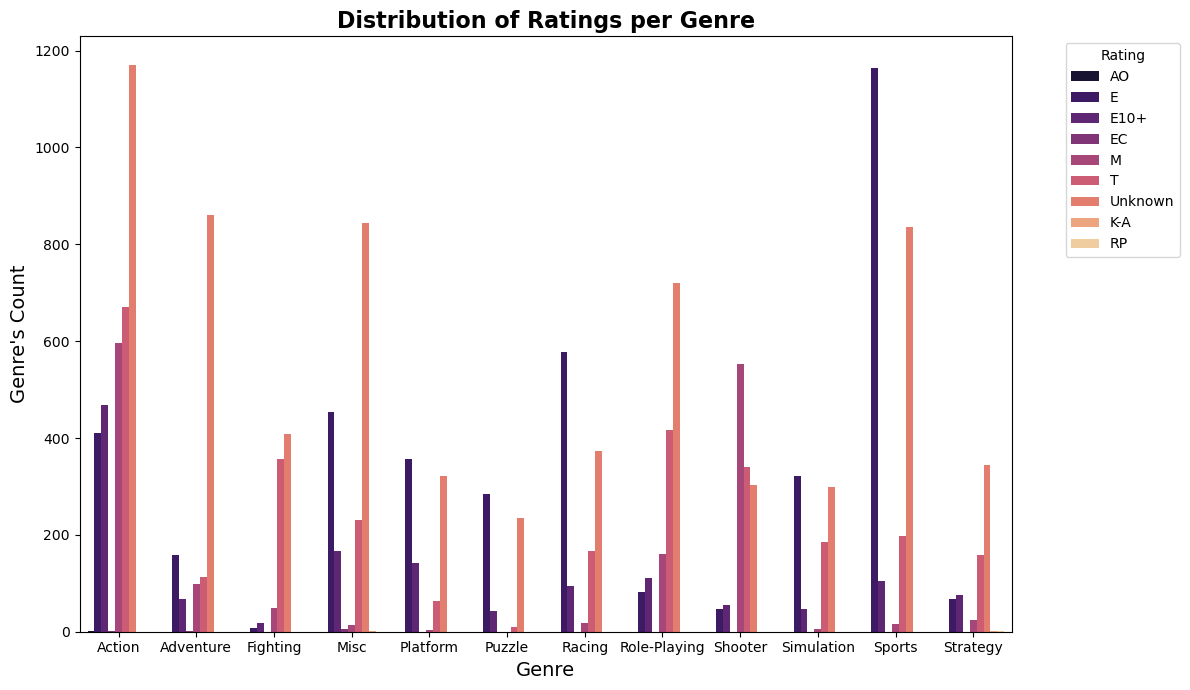

In [29]:
# Group data by Genre and Rating
grouped_data = df.groupby(['Genre', 'Rating']).size().reset_index(name='Count')

# Create a grouped bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    data=grouped_data,
    x='Genre',
    y='Count',
    hue='Rating',
    palette='magma'
)

# Add titles and labels
plt.title('Distribution of Ratings per Genre', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=14)
plt.ylabel("Genre's Count", fontsize=14)

# Move the legend
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

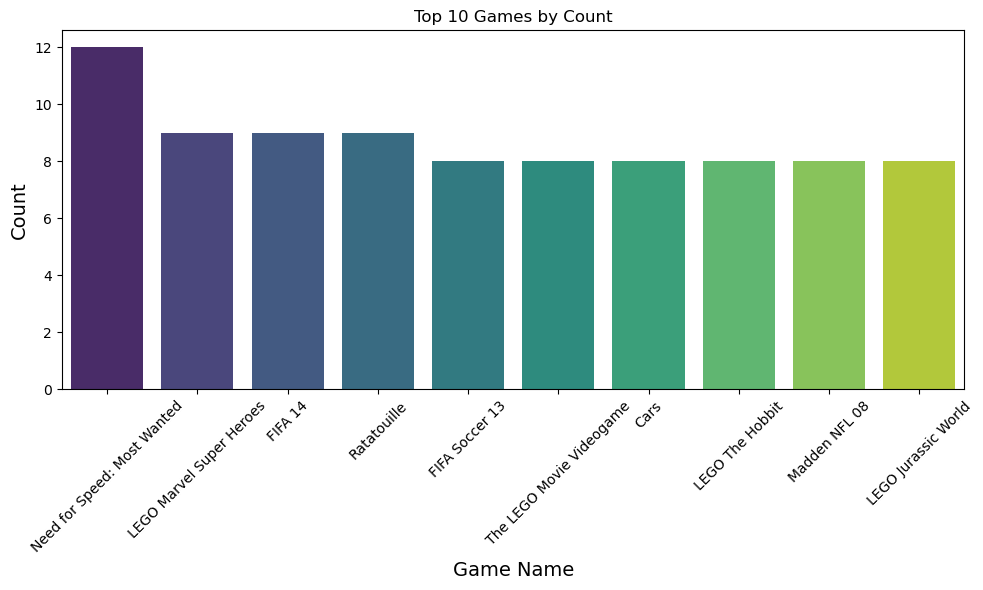

In [30]:
# Count occurrences of each game
gameCounts = df['Name'].value_counts().reset_index()
gameCounts.columns = ['Name', 'Count']

# Select top 5 games
top_10_games = gameCounts.head(10)

# Plot the top 5 games
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_games, x='Name', y='Count', palette='viridis')

# Add titles and labels
plt.title('Top 10 Games by Count')
plt.xlabel('Game Name', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# Recommender System

## Content-Based Filtering

In [31]:
SMD = df.copy()
SMD['text'] = SMD['Name'] + ', ' + SMD['Platform'] + ', ' + SMD['Genre'] + ', ' + SMD['Publisher'] + ', ' + SMD['Developer'] + ', ' + SMD['Rating'] + ', ' + str(SMD['Year_of_Release']) + str(SMD['Global_Sales']) + str(SMD['User_Count'])
SMD.dropna(subset=['text'], inplace=True)
SMD['text'] = SMD['text'].str.lower()

In [32]:
x = SMD.copy()
x = x.sample(10000)
x = x.drop_duplicates(subset=['text']).reset_index(drop=True)
x['text'].duplicated().sum()

0

In [33]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(x['text']).toarray()
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

## Recommender System

In [36]:
def get_recommendations(name, cosine_sim=cosine_sim, num_recommend = 5):
    indices = pd.Series(x.index, index=x['Name']).drop_duplicates()
    idx = indices[name].iloc[0] if isinstance(indices[name], pd.Series) else indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_similar = sim_scores[1:num_recommend+1]
    game_indices = [i[0] for i in top_similar]
    ret_df = pd.DataFrame(x.iloc[game_indices])
    ret_df['Score'] = [i[1] for i in top_similar]
    ret_df = ret_df.drop(columns = ['text'])
    return ret_df

In [37]:
x['Name'].head(20)

0                Uncharted: The Nathan Drake Collection
1                                  Halo: Combat Evolved
2     Pirates of the Caribbean: The Curse of the Bla...
3                                         Madden NFL 07
4                         The Bureau: XCOM Declassified
5                                     Beyond The Beyond
6                                         Splatterhouse
7                1000 Cooking Recipes from ELLE à table
8                                            Battlezone
9                                           Ms. Pac-Man
10                                     Super Bubble Pop
11                                        Carnage Heart
12                                          Urban Chaos
13                              Mat Hoffman's Pro BMX 2
14                                      The Evil Within
15                           Monster Rancher Hop-A-Bout
16                                          Van Helsing
17                       Pokemon Ranger: Guardia

## Recommender System's Evaluation

In [38]:
df[df['Name'] == 'Uncharted: The Nathan Drake Collection'].iloc[:1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,Sony Computer Entertainment,2.07,1.71,0.08,0.76,4.62,1264.0,Bluepoint Games,T


In [39]:
gamesRec = get_recommendations('Uncharted: The Nathan Drake Collection')
gamesRec

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,Score
7057,God of War Collection,PS3,2009,Action,Sony Computer Entertainment,1.70,0.44,0.06,0.40,2.60,529.0,Bluepoint Games,M,0.666807
9449,Uncharted 3: Drake's Deception,PS3,2011,Action,Sony Computer Entertainment,2.77,2.75,0.19,1.03,6.74,3712.0,Naughty Dog,T,0.634406
6540,The Last of Us,PS4,2014,Action,Sony Computer Entertainment,1.88,2.00,0.07,0.77,4.71,24.0,Unknown,Unknown,0.629532
3804,ICO,PS3,2011,Action,Sony Computer Entertainment,0.00,0.00,0.06,0.00,0.06,27.0,Bluepoint Games,T,0.624944
5411,Gravity Rush Remastered,PS4,2015,Action,Sony Computer Entertainment,0.02,0.05,0.04,0.01,0.13,153.0,Bluepoint Games,T,0.591129


As we can see, the results are the top 5 recommended games with a score ranging from 59% to 66% based on 'Uncharted: The Nathan Drake Collection', which means all of the recommended games are significantly related to the inputted game. Moreover, the recommended games are somewhat similar to the inputted game based on *Name*, *Genre*, and *Publisher*. All and all, the recommender system works effectively by recommending several games that are associated with the inputted game, verify relevant and consequential recommendations. 

In [45]:
df[df['Name'] == 'Ms. Pac-Man'].iloc[:1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating
1108,Ms. Pac-Man,2600,1981,Puzzle,Atari,1.54,0.1,0.0,0.02,1.65,24.0,Unknown,Unknown


In [44]:
gamesRec = get_recommendations('Ms. Pac-Man')
gamesRec

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,Score
8269,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.0,0.08,7.81,24.0,Unknown,Unknown,0.913953
7678,Jr. Pac-Man,2600,1983,Puzzle,Atari,0.72,0.05,0.0,0.01,0.78,24.0,Unknown,Unknown,0.841183
2966,Ms. Pac-Man Maze Madness,PS,2000,Puzzle,Namco Bandai Games,0.25,0.17,0.0,0.03,0.44,24.0,Unknown,Unknown,0.760418
2824,Ms. Pac-Man: Maze Madness / Pac-Man World,GBA,2005,Puzzle,Namco Bandai Games,0.17,0.06,0.0,0.00,0.24,24.0,Unknown,Unknown,0.759476
5002,Ms. Pac-Man: Maze Madness,N64,2000,Puzzle,Namco Bandai Games,0.18,0.04,0.0,0.00,0.22,24.0,Unknown,Unknown,0.752955


As we can see, the results are the top 5 recommended games with a score ranging from 75% to 91% based on 'Ms. Pac-Man', which means all of the recommended games are significantly related to the inputted game. Moreover, the recommended games share similarities to the inputted game based on *Name*, *Genre*, and *Publisher*. All and all, the recommender system works effectively by recommending several games that are associated with the inputted game, verify relevant and consequential recommendations. 

In [46]:
df[df['Name'] == 'Halo: Combat Evolved'].iloc[:1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating
129,Halo: Combat Evolved,XB,2001,Shooter,Microsoft Game Studios,4.98,1.3,0.08,0.07,6.43,1283.0,Bungie Software,M


In [47]:
gamesRec = get_recommendations('Halo: Combat Evolved')
gamesRec

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Count,Developer,Rating,Score
1317,Halo: Combat Evolved,PC,2003,Shooter,Microsoft Game Studios,0.02,0.02,0.00,0.00,0.04,396.0,Gearbox Software,M,0.854312
9855,Halo 3: ODST,X360,2009,Shooter,Microsoft Game Studios,4.34,1.34,0.06,0.61,6.34,1163.0,"Bungie Software, Bungie",M,0.770318
9906,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7.04,1.95,0.08,0.79,9.86,2045.0,Bungie,M,0.758837
2001,Halo: Combat Evolved Anniversary,X360,2011,Shooter,Microsoft Game Studios,1.44,0.70,0.04,0.22,2.40,487.0,343 Industries,M,0.729838
1481,Halo 2,PC,2007,Shooter,Microsoft Game Studios,0.01,0.06,0.00,0.02,0.09,216.0,Microsoft Game Studios,M,0.727694


As we can see, the results are the top 5 recommended games with a score ranging from 72% to 85% based on 'Halo: Combat Evolved', which means all of the recommended games are significantly related to the inputted game. Moreover, the recommended games are similar to the inputted game based on *Name*, *Genre*, and *Publisher*. All and all, the recommender system works effectively by recommending several games that are associated with the inputted game, verify relevant and consequential recommendations. 

# Conclusion

Based on three outputs that we gathered before, we can come to conclusion that the recommender system is **highly effective** at giving suggestions with the inputted game. The system always give out results that related to the input's features, such as **Name**, **Genre**, **Publisher**, **Developer**, **Rating**, and **User_Count**. To sum up, the recommender system verifies relevant and consequential recommendations. 